In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ngram

  Created wheel for ngram: filename=ngram-3.3.2-cp27-none-any.whl size=24731 sha256=6e8651507eaec8df568650172c1485106d97d384a3dc9ede0545fb275019bb41
  Stored in directory: /root/.cache/pip/wheels/7b/d5/5a/6abe3035c83a606376089accde30b021ffb26593f0d6609ef1
Successfully built ngram


In [ ]:
pip install statistics

  Created wheel for statistics: filename=statistics-1.0.3.5-cp27-none-any.whl size=7454 sha256=07f1315ff8389e50cf3d37e449687a1b2a35b3bb65cecc344f8e1626a950b323
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
Successfully built statistics


In [ ]:
import pandas as pd
import numpy as np
#import sys
#sys.path.append('/content/drive/MyDrive/Cyber Security/grams_data')

In [ ]:
import signal
import sys
# from ngram import NGram
import itertools
import collections
# import statistics

ImportError: ignored

# DATASET

In [ ]:
dataset_1 = pd.read_csv("/content/drive/MyDrive/Cyber Security/dga_domains_full.csv", encoding= "latin1", index_col = 0)
dataset_2 = pd.read_csv("/content/drive/MyDrive/Cyber Security/dga_domains_sample.csv", encoding= "latin1", index_col = 0)

In [ ]:
colnames11=['domain', 'masked', 'type','Mean (1-gram)','Variance (1-gram)','Standard deviation (1-gram)', 'Standard deviation (2-gram)','Different characters','String Lenght','ccc','cvc','vcc','vcv','cv','vc','cc','c','v'] 
dataset_11 = pd.read_csv("/content/drive/MyDrive/Cyber Security/grams_data/dga_completo.csv", encoding= "latin1", names=colnames11)
dataset_22 = pd.read_csv("/content/drive/MyDrive/Cyber Security/grams_data/clean_completo.csv", encoding= "latin1", names=colnames11)

In [ ]:
dataset_11.head()

,domain,masked,type,Mean (1-gram),Variance (1-gram),Standard deviation (1-gram),Standard deviation (2-gram),Different characters,String Lenght,ccc,cvc,vcc,vcv,cv,vc,cc,c,v
0,kmbnvnhxqkpop.com,cccccccccccvc.cvc,MALWARE,1.416667,0.265152,0.514929,0.00000,12,17,9,2,0,0,2,2,10,14,2
1,machineboneroomdiscountcrash.com,cvccvcvcvcvcvvccvccvvccccvcc.cvc,MALWARE,2.133333,1.409524,1.187234,0.31497,15,32,2,8,5,4,10,10,7,19,12
2,iunabzrg.com,vvcvcccc.cvc,MALWARE,1.000000,0.000000,0.000000,0.00000,12,12,2,2,1,1,2,3,3,7,4
3,icfkdyjhwnwrlee.com,vccccccccccccvv.cvc,MALWARE,1.187500,0.162500,0.403113,0.00000,16,19,10,1,1,0,2,2,11,14,4
4,thumbsentering.net,ccvcccvccvcvcc.cvc,MALWARE,1.500000,0.818182,0.904534,0.00000,12,18,1,5,3,1,5,5,5,12,5


In [ ]:
dataset_22.head()

,domain,masked,type,Mean (1-gram),Variance (1-gram),Standard deviation (1-gram),Standard deviation (2-gram),Different characters,String Lenght,ccc,cvc,vcc,vcv,cv,vc,cc,c,v
0,plasticbags.sa.com,ccvccvccvcc.cv.cvc,CLEAN,1.500000,0.636364,0.797724,0.0,12,18,0,4,3,0,5,4,4,11,5
1,mzltrack.com,cccccvcc.cvc,CLEAN,1.200000,0.177778,0.421637,0.0,10,12,3,2,1,0,2,2,5,9,2
2,miss-slim.ru,cvccsccvc.cv,CLEAN,1.500000,0.571429,0.755929,0.0,8,12,0,2,1,0,3,2,2,7,3
3,myhostingpack.com,cccvccvcccvcc.cvc,CLEAN,1.214286,0.181319,0.425815,0.0,14,17,2,4,3,0,4,4,6,12,4
4,download-by-satoshi.com,cvcccvvcsccscvcvccv.cvc,CLEAN,1.437500,0.662500,0.813941,0.0,16,23,1,4,2,1,6,5,4,13,7


In [ ]:
colnames=['tipo', 'family', 'domain'] 
df = pd.read_csv("/content/drive/MyDrive/Cyber Security/dga_domains_full.csv", sep=',', encoding="latin1", names=colnames)
df.head()

,tipo,family,domain
0,dga,gozi,mortiscontrastatim.com
1,dga,corebot,cvyh1po636avyrsxebwbkn7.ddns.net
2,legit,alexa,plasticbags.sa.com
3,legit,alexa,mzltrack.com
4,legit,alexa,miss-slim.ru


In [ ]:
337500 + 337398

674898

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674898 entries, 0 to 674897
Data columns (total 3 columns):
tipo      674898 non-null object
family    674898 non-null object
domain    674898 non-null object
dtypes: object(3)
memory usage: 15.4+ MB


In [ ]:
df_dga = df[df["tipo"] == "dga"]
df_dga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337500 entries, 0 to 674897
Data columns (total 3 columns):
tipo      337500 non-null object
family    337500 non-null object
domain    337500 non-null object
dtypes: object(3)
memory usage: 10.3+ MB


In [ ]:
df_legit = df[df["tipo"] == "legit"]
df_legit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337398 entries, 2 to 674895
Data columns (total 3 columns):
tipo      337398 non-null object
family    337398 non-null object
domain    337398 non-null object
dtypes: object(3)
memory usage: 10.3+ MB


In [ ]:
sample_len = 100000
if sample_len > 0:
  balanced_d = pd.concat([df_legit.sample(sample_len), df_dga.sample(sample_len)])
else:
  balanced_d = pd.concat([df_legit, df_dga.sample(len(df_legit))])
print(balanced_d.shape)
balanced_d.head()

(200000, 3)


,tipo,family,domain
5919,legit,alexa,hobbyzone.com
665612,legit,alexa,bkbm.com
623863,legit,alexa,kultu-rolog.ru
137938,legit,alexa,planchevrolet.com.ar
410370,legit,alexa,mhshsushistory.weebly.com


In [ ]:
df_dga_1 = balanced_d[balanced_d["tipo"] == "dga"]
del df_dga_1['family']
del df_dga_1['tipo']
df_dga_1.head()

,domain
34795,mlu0gh56ahy6y0qdcfu.ddns.net
537344,koqpurel.ru
595384,vermont-packet.net
629268,gapricebeeyebottlefocusremove.com
502524,nuqunoge.ru


In [ ]:
df_legit_1 = balanced_d[balanced_d["tipo"] == "legit"]
del df_legit_1['family']
del df_legit_1['tipo']
df_legit_1.head()

,domain
5919,hobbyzone.com
665612,bkbm.com
623863,kultu-rolog.ru
137938,planchevrolet.com.ar
410370,mhshsushistory.weebly.com


In [ ]:
name = sample_len/1000
if sample_len > 0:
  df_dga_1.to_csv(r"/content/drive/MyDrive/Cyber Security/grams_data/txt/dga-" + str(name) + "k.txt", index=False, header=False)
  df_legit_1.to_csv(r"/content/drive/MyDrive/Cyber Security/grams_data/txt/alexa-" + str(name) + "k.txt", index=False, header=False)
else:
  df_dga_1.to_csv(r"/content/drive/MyDrive/Cyber Security/grams_data/txt/dga-completo.txt", index=False, header=False)
  df_legit_1.to_csv(r"/content/drive/MyDrive/Cyber Security/grams_data/txt/alexa-completo.txt", index=False, header=False)

In [ ]:
df_dga.to_csv(r"/content/drive/MyDrive/Cyber Security/grams_data/txt/dga-" + str(name) + "k.txt", index=False, header=False)
df_legit.to_csv(r"/content/drive/MyDrive/Cyber Security/grams_data/txt/alexa-" + str(name) + "k.txt", index=False, header=False)

# ALGORITM

## Create files CSV

Nostro

In [ ]:
!python drive/MyDrive/Cyber\ Security/grams_data/top15_features.py "CLEAN" drive/MyDrive/Cyber\ Security/grams_data/txt/alexa-completo.txt > drive/MyDrive/Cyber\ Security/grams_data/csv/clean-completo.csv

In [ ]:
!python drive/MyDrive/Cyber\ Security/grams_data/top15_features.py "MALWARE" drive/MyDrive/Cyber\ Security/grams_data/txt/dga-completo.txt > drive/MyDrive/Cyber\ Security/grams_data/csv/dga-completo.csv

Esempio

In [ ]:
!python drive/MyDrive/Cyber\ Security/grams_data/top15_features.py "CLEAN" drive/MyDrive/Cyber\ Security/grams_data/esempio/alexa-32k.txt > drive/MyDrive/Cyber\ Security/grams_data/clean.csv

In [ ]:
!python drive/MyDrive/Cyber\ Security/grams_data/top15_features.py "MALWARE" drive/MyDrive/Cyber\ Security/grams_data/esempio/dga-32k.txt > drive/MyDrive/Cyber\ Security/grams_data/dga.csv

## Execute R

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("caret")
install.packages("randomForest")
install.packages("pROC")
install.packages("e1071")

In [ ]:
%%R
library(caret)
library(randomForest)
library(pROC)

sink(file = "drive/MyDrive/Cyber\ Security/grams_data/output/output-0.txt") # Crea un file con i print
print("START")
print(Sys.time())

print("Loading data")
clean   <- read.table( "drive/MyDrive/Cyber\ Security/grams_data/csv/clean-0k.csv", header=FALSE, sep=",", na.strings="NaN", dec=",", strip.white=TRUE)
dga     <- read.table( "drive/MyDrive/Cyber\ Security/grams_data/csv/dga-0k.csv",   header=FALSE, sep=",", na.strings="NaN", dec=",", strip.white=TRUE)
print("data loaded")

m = ncol(clean)
for (j in 4:m)
{
    clean[,j]   <- as.numeric( clean[,j]   )
    dga[,j]     <- as.numeric( dga[,j]     )
}

selected_rows = 3:ncol(clean)

data_clean_full <- clean[,selected_rows]
data_dga_full   <- dga[,selected_rows]
data <- rbind( data_clean_full, data_dga_full )

# Create train and test sets for each dataset
set.seed(1234)

# Perform 10 fold cross validation
# Parameters
l<-c()
accuracy<-0
sensitivity<-0
f1<-0
precision<-0
vec <- 0

# n-folds
n<-10

#Randomly shuffle the data
yourData<-data[sample(nrow(data)),]

#Create N equally size folds
folds <- cut(seq(1,nrow(yourData)),breaks=n,labels=FALSE)

for(i in 1:n){
    print(sprintf("Iteration: %i", i))
    #Segement your data by fold using the which() function 
    testIndexes <- which(folds==i,arr.ind=TRUE)
    trainData <- yourData[-testIndexes, ]
    testData <- yourData[testIndexes, ]

    ctrl <- trainControl(method = "none",repeats = 1,classProbs = TRUE,summaryFunction = twoClassSummary)
    system.time({
      rfFit <- train(V3~.,data = trainData,method = "rf",trControl = ctrl)
    })
    # print(rfFit)
    system.time({
      rfPred <- predict(rfFit, testData)
    })
    # print(rfPred)

    importance = varImp(rfFit)
    # print(importance)

    cm <- confusionMatrix(rfPred,as.factor(testData[,1]))
    # print(cm)
    print(cm$overall['Accuracy']) # Per Accuracy
    print(cm$byClass) # Per Sensitivity, F1, Precision
    print(cm$table) # Per matrice confusione

    # print(cm$overall['Accuracy'])
    # print(cm$byClass['Sensitivity'])
    # print(cm$byClass['F1'])
    # print(cm$byClass['Precision'])

    accuracy <- accuracy + cm$overall['Accuracy']
    sensitivity <- sensitivity + cm$byClass['Sensitivity']
    f1 <- f1 + cm$byClass['F1']
    precision <- precision + cm$byClass['Precision']

    cm_d <- as.data.frame(cm$table)
    # print(cm_d) # Per matrice confusione

    vec <- vec + cm_d['Freq'] # Matrice di confusione
    l <- c(l,cm)
}
print("Media K-Fold")
accuracy <- accuracy/n
sensitivity <- sensitivity/n
f1 <- f1/n
precision <- precision/n
vec <- vec/n

print(accuracy)
print(sensitivity)
print(f1)
print(precision)
print("Matrice di confusione")
print(sprintf("TP: %.3f", vec$Freq[[1]]))
print(sprintf("FN: %.3f", vec$Freq[[2]]))
print(sprintf("FP: %.3f", vec$Freq[[3]]))
print(sprintf("TN: %.3f", vec$Freq[[4]]))

warnings()

print(Sys.time())
print("END")
sink(file = NULL) # Chiude il file

/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: lattice

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: randomForest 4.6-14

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Type rfNews() to see new features/changes/bug fixes.

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘randomForest’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python2.7/dist-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following object is masked from ‘package:ggplot2’:

    margin


  warnings.warn(x, RRuntimeWarning)

#PROVA

In [ ]:
%%R
library(caret)
library(randomForest)
library(pROC)

sink(file = "drive/MyDrive/Cyber\ Security/grams_data/output/output-0.txt") # Crea un file con i print
print("START")
print(Sys.time())

print("Loading data")
clean   <- read.table( "drive/MyDrive/Cyber\ Security/grams_data/csv/clean-0k.csv", header=FALSE, sep=",", na.strings="NaN", dec=",", strip.white=TRUE)
dga     <- read.table( "drive/MyDrive/Cyber\ Security/grams_data/csv/dga-0k.csv",   header=FALSE, sep=",", na.strings="NaN", dec=",", strip.white=TRUE)
print("data loaded")

m = ncol(clean)
for (j in 4:m)
{
    clean[,j]   <- as.numeric( clean[,j]   )
    dga[,j]     <- as.numeric( dga[,j]     )
}

selected_rows = 3:ncol(clean)

data_clean_full <- clean[,selected_rows]
data_dga_full   <- dga[,selected_rows]
data <- rbind( data_clean_full, data_dga_full )

# Create train and test sets for each dataset
set.seed(1234)

# Perform 10 fold cross validation
# Parameters
l<-c()
accuracy<-0
sensitivity<-0
f1<-0
precision<-0
vec <- 0

# n-folds
n<-10

#Randomly shuffle the data
yourData<-data[sample(nrow(data)),]

#Create N equally size folds
folds <- cut(seq(1,nrow(yourData)),breaks=n,labels=FALSE)

for(i in 1:n){
    print(sprintf("Iteration: %i", i))
    #Segement your data by fold using the which() function 
    testIndexes <- which(folds==i,arr.ind=TRUE)
    trainData <- yourData[-testIndexes, ]
    testData <- yourData[testIndexes, ]

    ctrl <- trainControl(method = "none",repeats = 1,classProbs = TRUE,summaryFunction = twoClassSummary)
    system.time({
      rfFit <- train(V3~.,data = trainData,method = "rf",trControl = ctrl)
    })
    # print(rfFit)
    system.time({
      rfPred <- predict(rfFit, testData)
    })
    # print(rfPred)

    importance = varImp(rfFit)
    # print(importance)

    cm <- confusionMatrix(rfPred,as.factor(testData[,1]))
    # print(cm)
    print(cm$overall['Accuracy']) # Per Accuracy
    print(cm$byClass) # Per Sensitivity, F1, Precision
    print(cm$table) # Per matrice confusione

    # print(cm$overall['Accuracy'])
    # print(cm$byClass['Sensitivity'])
    # print(cm$byClass['F1'])
    # print(cm$byClass['Precision'])

    accuracy <- accuracy + cm$overall['Accuracy']
    sensitivity <- sensitivity + cm$byClass['Sensitivity']
    f1 <- f1 + cm$byClass['F1']
    precision <- precision + cm$byClass['Precision']

    cm_d <- as.data.frame(cm$table)
    # print(cm_d) # Per matrice confusione

    vec <- vec + cm_d['Freq'] # Matrice di confusione
    l <- c(l,cm)
}
print("Media K-Fold")
accuracy <- accuracy/n
sensitivity <- sensitivity/n
f1 <- f1/n
precision <- precision/n
vec <- vec/n

print(accuracy)
print(sensitivity)
print(f1)
print(precision)
print("Matrice di confusione")
print(sprintf("TP: %.3f", vec$Freq[[1]]))
print(sprintf("FN: %.3f", vec$Freq[[2]]))
print(sprintf("FP: %.3f", vec$Freq[[3]]))
print(sprintf("TN: %.3f", vec$Freq[[4]]))

warnings()

print(Sys.time())
print("END")
sink(file = NULL) # Chiude il file


Normalized confusion matrix:
[[0.89159094 0.10840906]
 [0.17696015 0.82303985]]



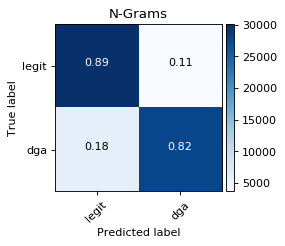

Confusion matrix plotted


In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# todo set params
out_path = "drive/MyDrive" #drive/MyDrive
test_name = "dga_domains"
class_names = ["legit", "dga"]
title="N-Grams"
normalize = True
cm = np.array([[30082.100, 3657.700], [5970.600, 27769.200]])
def plot_confusion_matrix(cm, classes, normalize=normalize,
                          title=title,
                          cmap=plt.cm.Blues):
  fig = plt.figure(figsize=(4, 3), dpi=80)
  im = plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("\nNormalized confusion matrix:")
  else:
      print("\nConfusion matrix, without normalization:")
  print(cm)
  print("")
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, round(cm[i, j],2),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ax = plt.gca()
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)
  plt.colorbar(im, cax=cax)
  fig.savefig("/content/drive/MyDrive/Cyber Security/cm_n_grams.png")
  plt.show()
  plt.close()

plot_confusion_matrix(cm, class_names)
print("Confusion matrix plotted")